In [6]:
import os, sys
import importlib

from utils import load, vis, models

In [22]:
importlib.reload(vis)

data_folder = "data/simplified/"
access_file_generator = map(lambda x : data_folder + x + '.csv', load.classes)
trainGenerator = vis.ImageGenerator(access_file_generator)

In [23]:
gen = trainGenerator.generateImages()

X.shape: (128, 450, 450, 4)
y.shape: (128, 8)


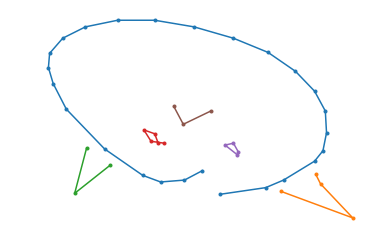

In [36]:
%matplotlib inline
X, y = next(gen)
print('X.shape:', X.shape)
print('y.shape:', y.shape)

array([0., 0., 0., 1., 0., 0., 0., 0.])

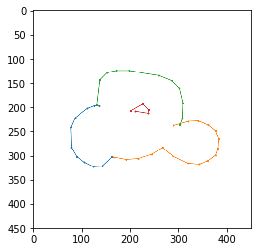

In [34]:
import matplotlib.pyplot as plt
plt.imshow(X[0].astype(int))
y[0]

In [39]:
importlib.reload(models)

model = models.DoodleConv1((*trainGenerator.dim,4), trainGenerator.n_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 450, 450, 4)       16        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      6304      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 32)      50208     
_________________________________________________________________
activation_1 (Activation)    (None, 108, 108, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 108, 108, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 108, 108, 32)      128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        51264     
__________

In [ ]:
model.fit_generator(generator=gen, epochs=5, steps_per_epoch=5)

Epoch 1/5
3/5 [=================>............] - ETA: 1:14 - loss: 2.4551